In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 라이브러리 불러오기

In [17]:
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from tqdm import tqdm
from math import pi

import warnings
warnings.filterwarnings('ignore')

# 그래프 한글화

In [3]:
# 실행 후 런타임 재시작 필요
!apt install fonts-nanum-coding  # 가독성이 좋은 나눔고딕코딩 선정
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum-coding
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 1,083 kB of archives.
After this operation, 4,610 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-coding all 2.5-1 [1,083 kB]
Fetched 1,083 kB in 2s (495 kB/s)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 123941 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/us

In [3]:
# 설치된 폰트 확인
for f in fm.get_fontconfig_fonts():
    if 'Nanum' in f:
        print(f)

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf


In [4]:
# matplotlib 설정
plt.rcParams['figure.figsize'] = (14, 4)
plt.rcParams['font.size'] = 13
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# 데이터셋 불러오기

In [20]:
data_path = '/content/drive/MyDrive/Colab Notebooks/캡스톤_4조/dataset/'
data = pd.read_csv(data_path + 'epl_data.csv')

data

,Unnamed: 0,이름,연봉(€),시즌,포지션,클럽팀,승점,전체 출장 시간,전체 골,전체 어시스트,...,90분당 골 관여,90분당 어시스트,90분당 골,90분당 실점,카드/90분,공격수 순위,미드필더 순위,수비수 순위,득점 순위,나이
0,5373,Andy Carroll,4194589,2014,Forward,westhamunited,47,1026,5,1,...,0.53,0.09,0.44,0.96,0.18,19,150,-1,3,25
1,5374,Kevin Nolan,2996135,2014,Midfielder,westhamunited,47,1746,1,1,...,0.10,0.05,0.05,0.93,0.10,206,201,-1,11,32
2,5375,Stewart Downing,2996135,2014,Midfielder,westhamunited,47,3314,6,8,...,0.38,0.22,0.16,1.09,0.08,107,43,-1,2,30
3,5379,Matt Jarvis,2097295,2014,Midfielder,westhamunited,47,413,0,0,...,0.00,0.00,0.00,0.65,0.00,276,303,-1,14,28
4,5380,James Collins,2097295,2014,Defender,westhamunited,47,1879,0,0,...,0.00,0.00,0.00,0.96,0.34,390,415,35,25,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,509,Kieran Tierney,6591497,2022,Defender,arsenal,99,280,0,0,...,0.00,0.00,0.00,0.64,0.00,186,180,2,13,25
3195,514,Aaron Ramsdale,3595362,2022,Goalkeeper,arsenal,99,720,0,0,...,0.00,0.00,0.00,1.00,0.00,183,177,25,19,24
3196,517,Gabriel Magalh찾es,2996135,2022,Defender,arsenal,99,720,1,0,...,0.13,0.00,0.13,1.00,0.00,91,178,26,6,25
3197,518,Albert Sambi Lokonga,2996135,2022,Forward,arsenal,99,195,0,0,...,0.00,0.00,0.00,1.38,0.00,-1,-1,-1,14,23


# 클럽별 선수 분포

In [6]:
# 클럽팀별 선수 수
data['클럽팀'].value_counts()

leicestercity             180
southampton               178
crystalpalace             177
manchesterunited          174
liverpool                 171
everton                   167
westhamunited             160
newcastleunited           159
tottenhamhotspur          157
manchestercity            152
arsenal                   151
chelsea                   149
burnley                   134
watford                   119
astonvilla                112
brighton&hovealbion       105
westbromwichalbion        100
stokecity                  84
swanseacity                74
wolverhamptonwanderers     65
norwichcity                63
sunderland                 62
fulham                     54
sheffieldunited            46
leedsunited                43
huddersfieldtown           42
hullcity                   39
brentford                  29
cardiffcity                21
middlesbrough              19
nottinghamforest           13
Name: 클럽팀, dtype: int64

승격/강등 팀들이 존재하여 클럽팀별 선수 집계가 다르게 나오는 것을 볼 수 있다.

In [ ]:
# data['국적'].value_counts(ascending=True)

# 포지션별 분포 확인

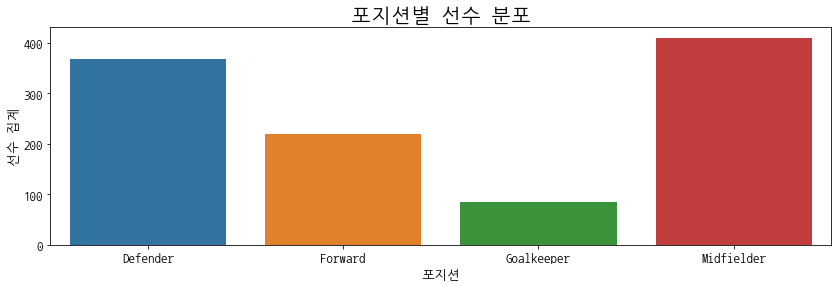


------- 선수 집계 ------


Midfielder    1245
Defender      1124
Forward        583
Goalkeeper     247
Name: 포지션, dtype: int64

In [7]:
target = data.groupby(['이름']).max().sort_values('포지션').reset_index()

plt.title('포지션별 선수 분포', size=20)
sns.countplot(x='포지션', data=target)
plt.ylabel('선수 집계')

plt.show()
print()
print('------- 선수 집계 ------')
data['포지션'].value_counts()

포지션에 따른 선수 숫자를 확인해 본 결과, 미드필더, 수비수, 공격수, 골키퍼 순으로 많은 것을 볼 수 있다.

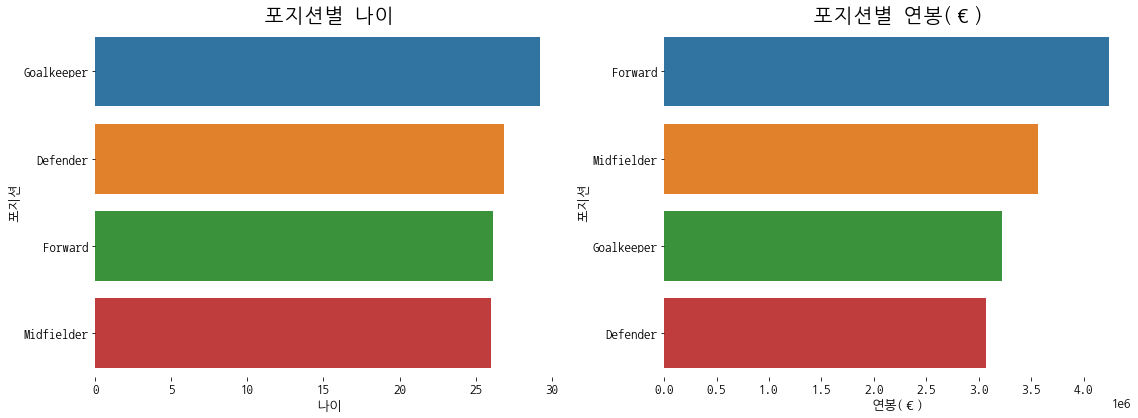

In [8]:
plt.figure(figsize=(16, 6))

# 포지션별 나이
lr = data.groupby('포지션')['나이'].mean().reset_index().sort_values('나이', ascending=False)

ratio = lr['나이']
labels = lr['포지션']

plt.subplot(121)
plt.title('포지션별 나이', size=20)
sns.set_color_codes('pastel')
sns.barplot(x=ratio, y=labels)
sns.despine(left=True, bottom=True)

# 포지션별 연봉(€)
lr = data.groupby('포지션')['연봉(€)'].mean().reset_index().sort_values('연봉(€)', ascending=False)

ratio = lr['연봉(€)']
labels = lr['포지션']

plt.subplot(122)
plt.title('포지션별 연봉(€)', size=20)
sns.set_color_codes('pastel')
sns.barplot(x=ratio, y=labels)
sns.despine(left=True, bottom=True)

plt.tight_layout()

포지션별 나이를 확인해보면 골키퍼의 나이가 비교적 높은 것을 볼 수 있다. 다른 포지션에 비해 활동량이 적은 것이 원인으로 보인다.

연봉을 살펴보면 공격수, 미드필더, 골키퍼, 수비수 순으로 많이 받는 경향이 있다.

# 포지션별 스탯 비교

In [22]:
def render_spider_plot(data1:pd.DataFrame, data2=None, columns=None, ax=None, title='', label=[]):
    "방사형 그래프 그리기"
    if not columns:
        columns = ['90분당 골 관여', '연봉(€)', '90분당 골', '90분당 어시스트', '90분당 실점', '클린시트', '전체 출장 시간']

    if not label:
        label = ['비교군', '타팀']

    data1 = data1[columns].mean().reset_index()
    data2 = data2[columns].mean().reset_index()
    spider = pd.DataFrame([list(data1[0]), list(data2[0])], columns=columns)

    N = len(columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize the spider plot
    if not ax:
        ax = plt.subplot(111, polar=True)
    if title:
        ax.set_title(title, size=20)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], columns, size=11)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(list(range(25, 76, 25)), list(map(str, range(25, 76, 25))), color='grey', size=10)
    plt.ylim(0, 100)

    # Ind1
    values=spider.loc[0].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=label[0])
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=spider.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=label[1])
    ax.fill(angles, values, 'r', alpha=0.1)

    for g in ax.yaxis.get_gridlines(): ## grid line 
        g.get_path()._interpolation_steps = N
    
    spine = Spine(axes=ax,
            spine_type='circle',
            path=Path.unit_regular_polygon(N))
    
    ## Axes의 중심과 반지름을 맞춰준다.
    spine.set_transform(Affine2D().scale(.5).translate(.5, .5)+ax.transAxes)
            
    ax.spines = {'polar':spine} ## frame의 모양을 원에서 폴리곤으로 바꿔줘야한다.

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [31]:
# 기존 데이터에서 아래 컬럼들은 시즌 내 최고점을 기준으로 백분율 환산한다.
reg_data = data.copy()
columns = ['90분당 골 관여', '연봉(€)', '90분당 골', '90분당 어시스트', '90분당 실점', '클린시트', '전체 출장 시간']

for year in range(reg_data['시즌'].min(), reg_data['시즌'].max()+1):
    year_df = reg_data[reg_data['시즌'] == year]
    
    max_reg_data = {col: year_df[col].max() for col in columns}

    for index, row in year_df.iterrows():
        for col in columns:
            reg_data.at[index, col] = round(row[col] / max_reg_data[col] * 100, 2)

reg_data.reset_index(inplace=True, drop=True)
reg_data['90분당 실점'] = 100 - reg_data['90분당 실점']
reg_data[['이름','포지션', *columns]]

,이름,포지션,90분당 골 관여,연봉(€),90분당 골,90분당 어시스트,90분당 실점,클린시트,전체 출장 시간
0,Andy Carroll,Forward,50.96,28,43.14,15.79,64.04,29,30
1,Kevin Nolan,Midfielder,9.62,20,4.90,8.77,65.17,47,51
2,Stewart Downing,Midfielder,36.54,20,15.69,38.60,59.18,52,96
3,Matt Jarvis,Midfielder,0.00,14,0.00,0.00,75.66,29,12
4,James Collins,Defender,0.00,14,0.00,0.00,64.04,41,54
...,...,...,...,...,...,...,...,...,...
3194,Kieran Tierney,Defender,0.00,21,0.00,0.00,86.91,75,38
3195,Aaron Ramsdale,Goalkeeper,0.00,11,0.00,0.00,79.55,75,100
3196,Gabriel Magalh찾es,Defender,7.56,9,12.15,0.00,79.55,75,100
3197,Albert Sambi Lokonga,Forward,0.00,9,0.00,0.00,71.78,75,27


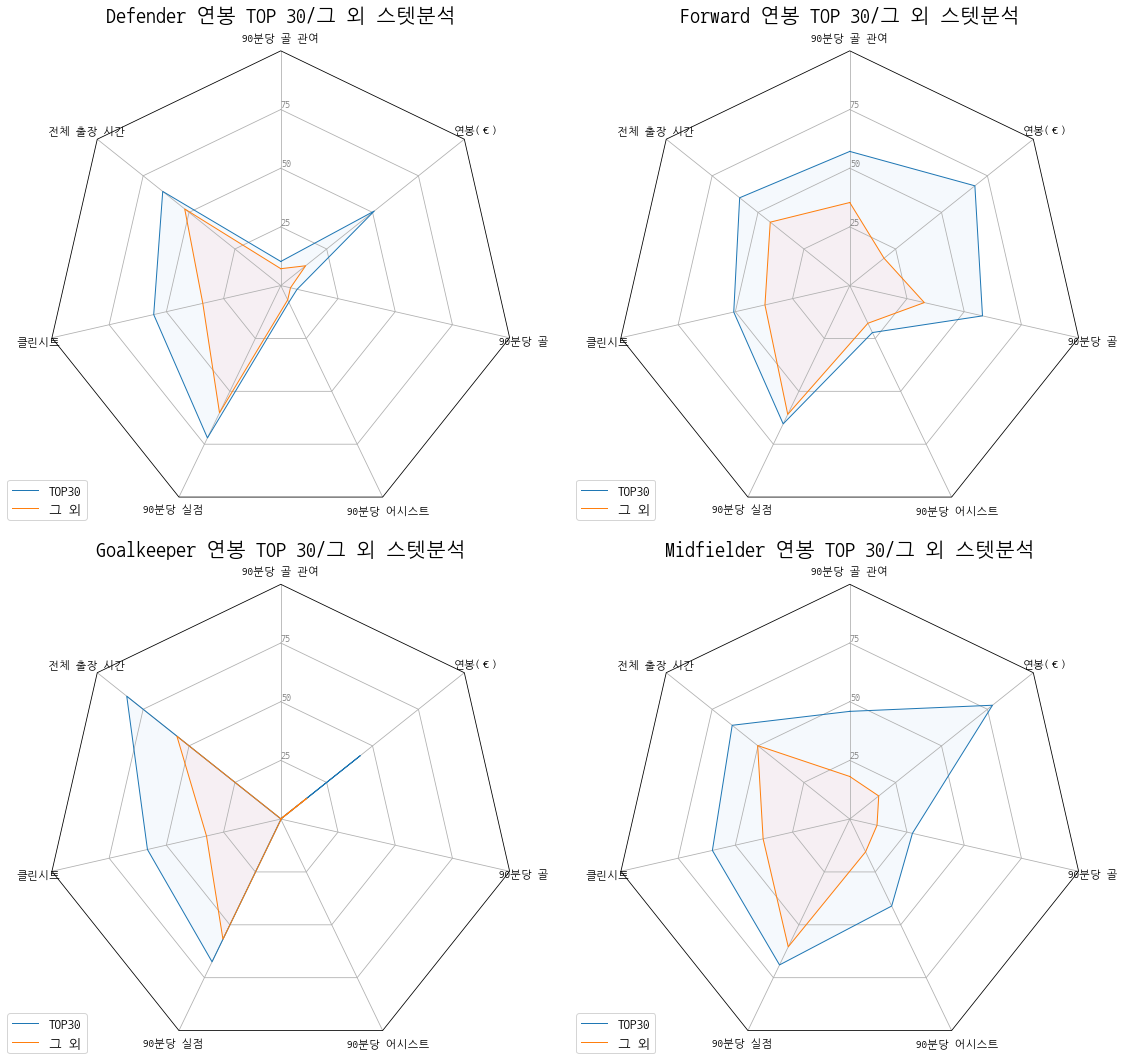

In [34]:
position = list(sorted(reg_data['포지션'].unique()))

plt.figure(figsize=(16, 15))
for idx, pos in enumerate(position):
    top_salary = reg_data[reg_data['포지션'] == pos].sort_values(['연봉(€)'], ascending=False)
    data1 = top_salary[:30]  # TOP 30
    data2 = top_salary  # 그 외
    ax = plt.subplot(220 + idx + 1, polar=True)
    render_spider_plot(data1, data2, title=f'{pos} 연봉 TOP 30/그 외 스텟분석', ax=ax, label=['TOP30', '그 외'])

plt.tight_layout()